# Классификация физлиц по уровню дохода

In [8]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Данные физлиц

In [9]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Подготовка данных (удаление пропусков)

In [10]:
data.replace('?', pd.NA).dropna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Графики

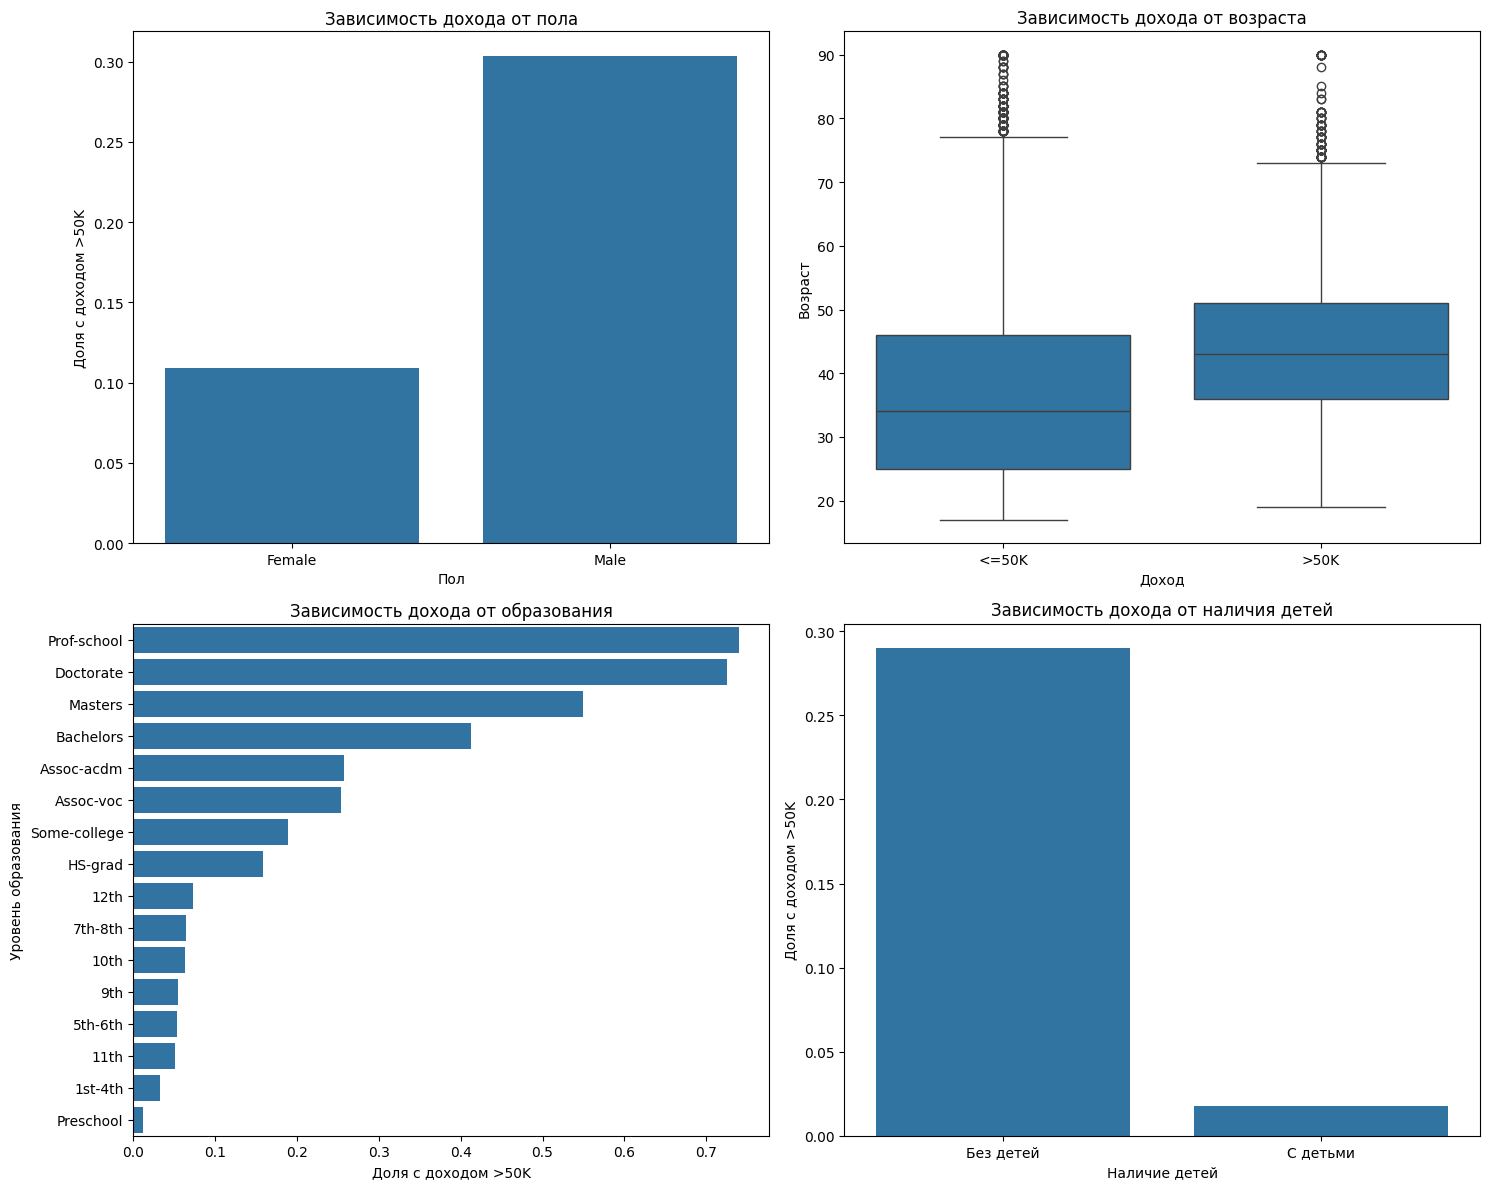

In [13]:
# Преобразование income в бинарную переменную (1 для >50K, 0 для <=50K)
data['income_binary'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Создаем фигуру с 4 подграфиками
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Пол-доход (gender-income)
gender_income = data.groupby('gender')['income_binary'].mean().reset_index()
sns.barplot(x='gender', y='income_binary', data=gender_income, ax=axes[0, 0])
axes[0, 0].set_title('Зависимость дохода от пола')
axes[0, 0].set_xlabel('Пол')
axes[0, 0].set_ylabel('Доля с доходом >50K')

# 2. Возраст-доход (age-income)
sns.boxplot(x='income', y='age', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Зависимость дохода от возраста')
axes[0, 1].set_xlabel('Доход')
axes[0, 1].set_ylabel('Возраст')

# 3. Образование-доход (education-income)
education_income = data.groupby('education')['income_binary'].mean().reset_index()
education_income = education_income.sort_values('income_binary', ascending=False)
sns.barplot(x='income_binary', y='education', data=education_income, ax=axes[1, 0])
axes[1, 0].set_title('Зависимость дохода от образования')
axes[1, 0].set_xlabel('Доля с доходом >50K')
axes[1, 0].set_ylabel('Уровень образования')

# 4. Количество детей-доход (relationship-income)
# Для этого создаем переменную "количество детей"
# Определяем детей по значениям в столбце relationship
children_flags = ['Own-child', 'Other-relative']
data['has_children'] = data['relationship'].apply(lambda x: 1 if x in children_flags else 0)
children_income = data.groupby('has_children')['income_binary'].mean().reset_index()
children_income['has_children'] = children_income['has_children'].map({0: 'Без детей', 1: 'С детьми'})
sns.barplot(x='has_children', y='income_binary', data=children_income, ax=axes[1, 1])
axes[1, 1].set_title('Зависимость дохода от наличия детей')
axes[1, 1].set_xlabel('Наличие детей')
axes[1, 1].set_ylabel('Доля с доходом >50K')

plt.tight_layout()
plt.show()

## Разделение датасета на обучающую и тестовую выборки

In [15]:
from sklearn.model_selection import train_test_split

# Разделение на признаки и целевую переменную
# Предполагаем, что целевая переменная - 'income'
X = data.drop('income', axis=1)  # все признаки
y = data['income']  # целевая переменная

# Разделение на обучающую и тестовую выборки (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,  # 20% для теста
    random_state=42,  # для воспроизводимости
    stratify=y  # стратификация по целевому признаку
)

# Проверка размеров
print(f"Всего записей: {len(data)}")
print(f"Обучающая выборка: {len(X_train)} записей ({len(X_train)/len(data)*100:.1f}%)")
print(f"Тестовая выборка: {len(X_test)} записей ({len(X_test)/len(data)*100:.1f}%)")
print(f"\nРазмер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер y_test: {y_test.shape}")

Всего записей: 48842
Обучающая выборка: 39073 записей (80.0%)
Тестовая выборка: 9769 записей (20.0%)

Размер X_train: (39073, 16)
Размер X_test: (9769, 16)
Размер y_train: (39073,)
Размер y_test: (9769,)


## Модель логистической регрессии

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Преобразование целевой переменной
y = y.map({'<=50K': 0, '>50K': 1})

# Преобразование категориальных признаков в числовые ДЛЯ КАЖДОЙ ВЫБОРКИ
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()

    # Обучаем на тренировочных данных
    X_train[column] = le.fit_transform(X_train[column].astype(str))

    # Применяем к тестовым данным (используем тот же кодировщик)
    # Если встретится новое значение в тесте, добавим его
    X_test[column] = X_test[column].astype(str).apply(
        lambda x: le.transform([x])[0] if x in le.classes_ else -1
    )

    label_encoders[column] = le

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Проверка точности на обучающей и тестовой выборках
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print(f"Точность на обучающей выборке: {train_score:.4f}")
print(f"Точность на тестовой выборке: {test_score:.4f}")

Точность на обучающей выборке: 1.0000
Точность на тестовой выборке: 1.0000


## График по двум главным признакам (PCA)
Ось X: PC1 = Комбинация всех признаков (например, 0.3*age + 0.5*education - 0.2*hours...)

Ось Y: PC2 = Другая комбинация признаков


Разные цвета: Люди с доходом ≤50K (синий) и >50K (красный)

Разделяющая линия: Где модель проводит границу между классами

Области: Где модель предсказывает ≤50K (синяя область) или >50K (красная область)

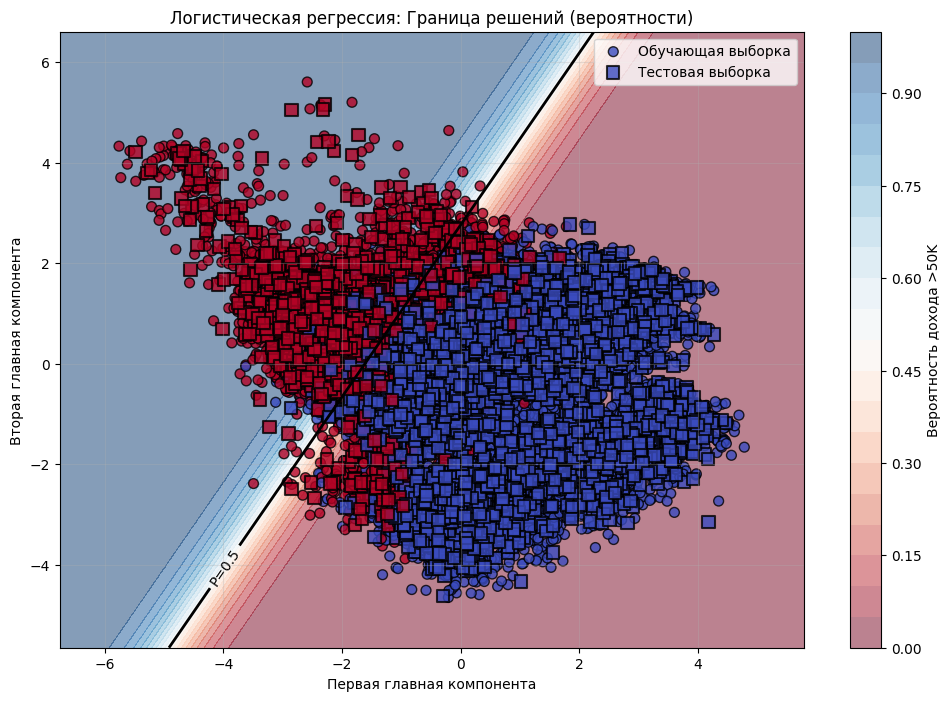

In [22]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Уменьшаем размерность до 2D с помощью PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Создаем сетку для границы решений
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Обратное преобразование из 2D в исходное пространство
grid = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid)

# Предсказание ВЕРОЯТНОСТЕЙ класса 1 (>50K)
Z_proba = model.predict_proba(grid_original)[:, 1]
Z_proba = Z_proba.reshape(xx.shape)

# График с вероятностями
plt.figure(figsize=(12, 8))

# Области решений (вероятности)
contour = plt.contourf(xx, yy, Z_proba, alpha=0.5, cmap='RdBu', levels=20)
plt.colorbar(contour, label='Вероятность дохода >50K')

# Линия порога 0.5
CS = plt.contour(xx, yy, Z_proba, levels=[0.5], colors='black', linewidths=2)
plt.clabel(CS, inline=True, fontsize=10, fmt='P=0.5')

# Убедимся, что y_train и y_test - числовые
if y_train.dtype == object:
    y_train_numeric = y_train.map({'<=50K': 0, '>50K': 1}) if '<=50K' in y_train.values else y_train.astype(int)
else:
    y_train_numeric = y_train

if y_test.dtype == object:
    y_test_numeric = y_test.map({'<=50K': 0, '>50K': 1}) if '<=50K' in y_test.values else y_test.astype(int)
else:
    y_test_numeric = y_test

# Обучающая выборка
scatter_train = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1],
                            c=y_train_numeric, cmap='coolwarm',
                            edgecolors='black', alpha=0.8,
                            s=50, label='Обучающая выборка')

# Тестовая выборка
scatter_test = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1],
                           c=y_test_numeric, cmap='coolwarm',
                           edgecolors='black', alpha=0.8,
                           s=80, marker='s', linewidth=1.5,
                           label='Тестовая выборка')

plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Логистическая регрессия: Граница решений (вероятности)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Метод опорных векторов SWM

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time

# Засекаем время
start_time = time.time()

# Создание и обучение модели SVM
svm_model = SVC(kernel='linear',  # линейное ядро
                C=1.0,           # параметр регуляризации
                random_state=42,
                probability=True) # для получения вероятностей

svm_model.fit(X_train_scaled, y_train)

# Время обучения
training_time = time.time() - start_time

# Предсказания
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Оценка модели
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("=" * 50)
print("МОДЕЛЬ МЕТОДА ОПОРНЫХ ВЕКТОРОВ (SVM)")
print("=" * 50)
print(f"Время обучения: {training_time:.2f} секунд")
print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")
print("\n" + "=" * 50)
print("ОТЧЕТ КЛАССИФИКАЦИИ (Тестовая выборка):")
print("=" * 50)
print(classification_report(y_test, y_test_pred,
                           target_names=['<=50K', '>50K']))

МОДЕЛЬ МЕТОДА ОПОРНЫХ ВЕКТОРОВ (SVM)
Время обучения: 0.22 секунд
Точность на обучающей выборке: 1.0000
Точность на тестовой выборке: 1.0000

ОТЧЕТ КЛАССИФИКАЦИИ (Тестовая выборка):
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00      7431
        >50K       1.00      1.00      1.00      2338

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769



## Сравнение разных ядер SVM

Сравнение разных ядер SVM:
Ядро: linear   | Train: 1.0000 | Test: 1.0000
Ядро: rbf      | Train: 1.0000 | Test: 0.9999
Ядро: poly     | Train: 1.0000 | Test: 1.0000
Ядро: sigmoid  | Train: 0.9888 | Test: 0.9886


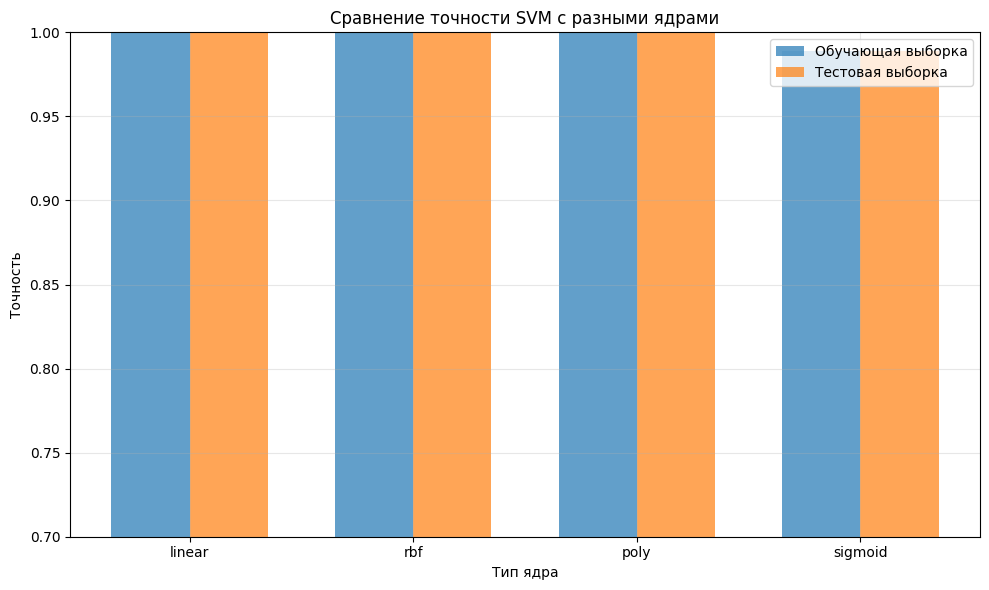

In [24]:
# Попробуем разные ядра для сравнения
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

print("Сравнение разных ядер SVM:")
print("=" * 50)

results = {}

for kernel in kernels:
    # Для полиномиального ядра задаем степень
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, C=1.0, random_state=42)
    else:
        model = SVC(kernel=kernel, C=1.0, random_state=42)

    model.fit(X_train_scaled, y_train)

    # Предсказания
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Точность
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    results[kernel] = {
        'train_accuracy': acc_train,
        'test_accuracy': acc_test
    }

    print(f"Ядро: {kernel:<8} | Train: {acc_train:.4f} | Test: {acc_test:.4f}")

# Визуализация сравнения
import matplotlib.pyplot as plt
import pandas as pd

# Создаем DataFrame для визуализации
df_results = pd.DataFrame(results).T

plt.figure(figsize=(10, 6))
x = range(len(df_results))
width = 0.35

plt.bar([i - width/2 for i in x], df_results['train_accuracy'],
        width=width, label='Обучающая выборка', alpha=0.7)
plt.bar([i + width/2 for i in x], df_results['test_accuracy'],
        width=width, label='Тестовая выборка', alpha=0.7)

plt.xlabel('Тип ядра')
plt.ylabel('Точность')
plt.title('Сравнение точности SVM с разными ядрами')
plt.xticks(x, df_results.index)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.7, 1.0)  # Масштабируем для лучшей видимости
plt.tight_layout()
plt.show()

## Визуализация SVM с линейным ядром

C:\Users\milutina.a\AppData\Local\Temp\ipykernel_12048\213956323.py:54: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1],


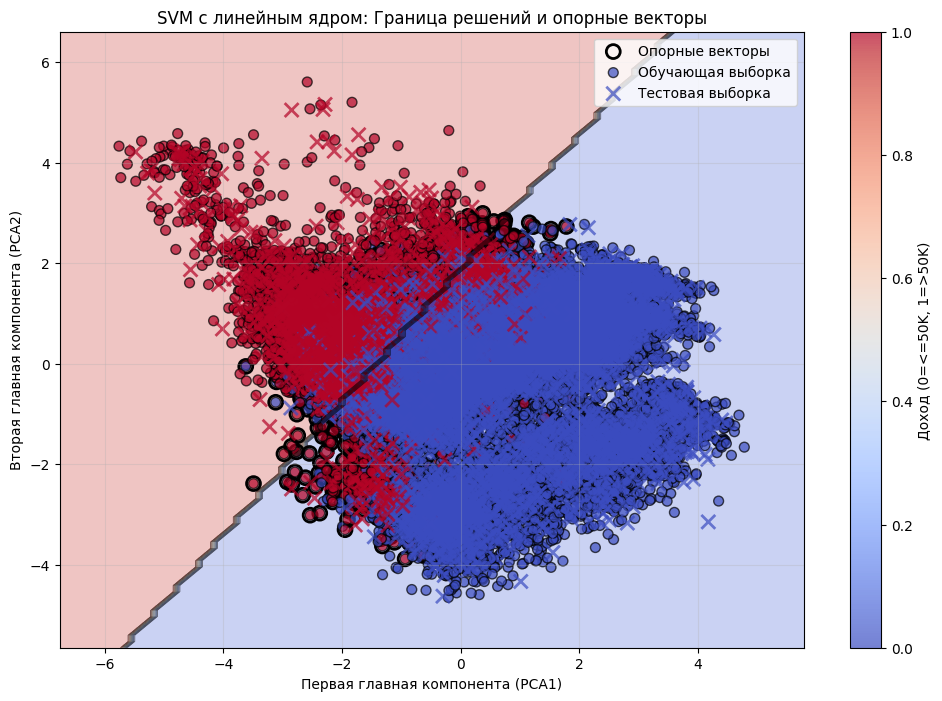

In [29]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Преобразуем y в числовой формат если нужно
y_train_numeric = y_train.copy()
y_test_numeric = y_test.copy()

if y_train_numeric.dtype == object:
    y_train_numeric = y_train_numeric.map({'<=50K': 0, '>50K': 1})
if y_test_numeric.dtype == object:
    y_test_numeric = y_test_numeric.map({'<=50K': 0, '>50K': 1})

# Для визуализации используем PCA для уменьшения размерности
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Обучаем SVM на 2D данных для визуализации
svm_2d = SVC(kernel='linear', C=1.0, random_state=42)
svm_2d.fit(X_train_2d, y_train_numeric)

# Создаем сетку для границы решений
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Предсказания для сетки
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.astype(float)  # Явное преобразование в float
Z = Z.reshape(xx.shape)

# График
plt.figure(figsize=(12, 8))

# Области решений
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.7)

# Опорные векторы (только для обучающей выборки)
support_vectors = svm_2d.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=100, facecolors='none', edgecolors='black',
            linewidths=2, label='Опорные векторы')

# Обучающая выборка
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1],
            c=y_train_numeric, cmap='coolwarm',
            edgecolors='black', alpha=0.7,
            s=50, label='Обучающая выборка')

# Тестовая выборка
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1],
            c=y_test_numeric, cmap='coolwarm',
            edgecolors='black', alpha=0.7,
            s=100, marker='x', linewidth=2,
            label='Тестовая выборка')

plt.xlabel('Первая главная компонента (PCA1)')
plt.ylabel('Вторая главная компонента (PCA2)')
plt.title('SVM с линейным ядром: Граница решений и опорные векторы')
plt.legend()
plt.colorbar(label='Доход (0=<=50K, 1=>50K)')
plt.grid(True, alpha=0.3)
plt.show()